# Background

# Objective
*   **Analisis Faktor Pengaruh** Mengindentifikasi indikator kependudukan yang dapat memengaruhi luasan wilayah yang terdampak bencana abrasi.
*   **Hubungan Antar Faktor** Melihat bagaimana kaitan antara faktor yang memengaruhi luasan wilayah terdampak bencana abrasi.

#Data Understanding

Pada project ini data yang digunakan bersumber dari Badan Penanggulangan Bencana Daerah Kabupaten Sambas. Dataset ini mencakup:
1. Data luasan daerah yang terdampak abrasi berdasarkan kelas kerusakannya
2. Total data luasan daerah yang terdampak abrasi
3. Data demografi wilayah yang terdampak abrasi

Berikut adalah tabel dengan nama atribut dan deskripsinya:

| Nama Atribut                        | Deskripsi                                                                                   |
|-------------------------------------|---------------------------------------------------------------------------------------------|
| ID Desa                             | Kode unik yang mengidentifikasi desa                                                        |
| Desa                                | Nama desa                                                                                   |
| Kecamatan                           | Kecamatan tempat desa berada                                                                |
| Rendah                              | Luasan daerah terdampak dengan kerusakan rendah (dalam hektar)                              |
| Sedang                              | Luasan daerah terdampak dengan kerusakan sedang (dalam hektar)                              |
| Tinggi                              | Luasan daerah terdampak dengan kerusakan tinggi (dalam hektar)                              |
| Total Luas (Ha)                     | Total luas daerah yang terdampak (dalam hektar)                                             |
| Kelas                               | Kategori kerusakan secara keseluruhan                                                      |
| Jarak ke Ibu Kota Kabupaten (km)    | Jarak desa ke ibu kota kabupaten (dalam kilometer)                                          |
| Jumlah Penduduk                     | Jumlah penduduk di desa tersebut                                                            |
| Kepadatan Penduduk (jiwa/km²)       | Kepadatan penduduk di desa tersebut (dalam jiwa per kilometer persegi)                      |
| Usia Lansia (60 ke atas)            | Jumlah penduduk berusia 60 tahun ke atas di desa tersebut                                   |
| Usia Anak (0-14 tahun)              | Jumlah penduduk berusia 0-14 tahun di desa tersebut                                         |
| Ibu Hamil                           | Jumlah ibu hamil di desa tersebut                                                           |
| Tingkat Pendidikan (SMA/sederajat)  | Jumlah penduduk dengan tingkat pendidikan setara SMA di desa tersebut                       |

# Import Library

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [20]:
#library
import numpy as np
from sklearn.linear_model import LinearRegression
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
import seaborn as sns
import smogn
import matplotlib.pyplot as plt

# Data Loading

In [3]:
data = pd.read_csv('GelombangAbrasi - glb.csv')

# EDA

### Menghapus Atribut yang Tidak Digunakan
* `ID Desa`
* `Desa`
* `Kecamatan`
* `Rendah`
* `Sedang`
* `Tinggi`
* `Kelas`

In [4]:
data['Total Luas'] = data['Rendah'] + data['Sedang'] + data['Tinggi']

In [5]:
data = data.drop(['Rendah', 'Sedang','Tinggi'], axis=1)

In [6]:
data = data.drop(['ID Desa','Desa','Kecamatan', 'Kelas'], axis=1)

In [7]:
data.head(2)

,Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Total Luas
0,62,5862,122.0,2869,424,1655,104.0,374,58.92
1,57,2407,133.0,1184,172,636,44.0,147,12.29


* Sediakan hipotesis
* Insight/Informasi tersembunyi dari data
* Distribusi dan Statistik Data
* Identifikasi Anomali
* Mengukur Korelasi

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32 entries, 0 to 31
Data columns (total 9 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   Jarak ke Ibu Kota Kabupaten (km)    32 non-null     int64  
 1   Jumlah Penduduk                     32 non-null     int64  
 2   Kepadatan Penduduk                  32 non-null     float64
 3   Perempuan                           32 non-null     int64  
 4   Usia Lansia (60 ke atas)            32 non-null     int64  
 5   Usia Anak (0-14 tahun)              32 non-null     int64  
 6   Ibu Hamil                           30 non-null     float64
 7   Tingkat Pendidikan (SMA/sederajat)  32 non-null     int64  
 8   Total Luas                          32 non-null     float64
dtypes: float64(3), int64(6)
memory usage: 2.4 KB


### Distribusi dan Statistik Data

array([[<AxesSubplot:title={'center':'Jarak ke Ibu Kota Kabupaten (km)'}>,
        <AxesSubplot:title={'center':'Jumlah Penduduk'}>,
        <AxesSubplot:title={'center':'Kepadatan Penduduk'}>],
       [<AxesSubplot:title={'center':'Perempuan'}>,
        <AxesSubplot:title={'center':'Usia Lansia (60 ke atas)'}>,
        <AxesSubplot:title={'center':'Usia Anak (0-14 tahun)'}>],
       [<AxesSubplot:title={'center':'Ibu Hamil'}>,
        <AxesSubplot:title={'center':'Tingkat Pendidikan (SMA/sederajat)'}>,
        <AxesSubplot:title={'center':'Total Luas'}>]], dtype=object)

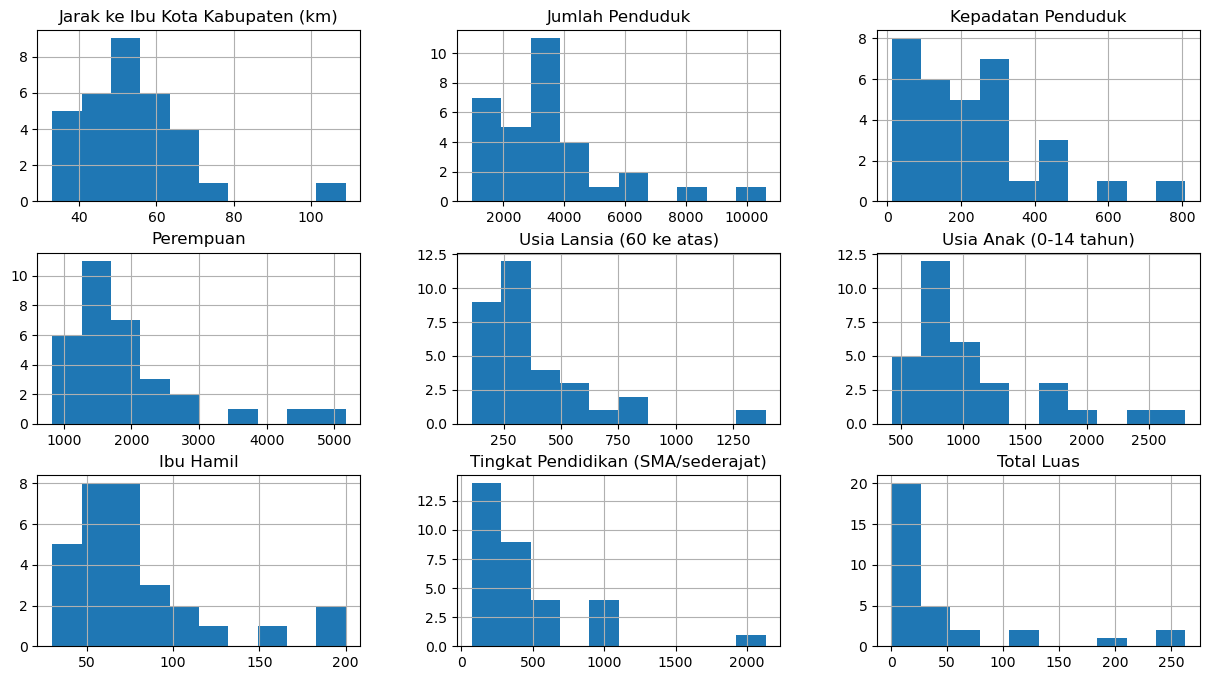

In [9]:
data.hist(figsize=(15,8))

In [10]:
data.describe()

,Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Total Luas
count,32.000000,32.000000,32.000000,32.000000,32.000000,32.000000,30.000000,32.000000,32.000000
mean,53.343750,3465.718750,225.824688,1928.593750,375.218750,1080.281250,78.400000,448.875000,46.296250
std,14.113844,2027.427867,184.758076,1007.720995,258.033848,563.429775,41.350145,409.274476,69.627417
min,33.000000,970.000000,12.000000,829.000000,112.000000,426.000000,30.000000,74.000000,0.390000
25%,45.750000,2188.750000,95.250000,1379.250000,197.750000,727.500000,53.250000,229.750000,9.912500
50%,52.000000,3158.000000,208.000000,1634.500000,330.000000,888.000000,68.500000,315.500000,21.400000
75%,57.250000,4088.500000,297.750000,2045.250000,431.250000,1228.000000,88.000000,521.500000,41.140000
max,109.000000,10615.000000,809.000000,5169.000000,1390.000000,2796.000000,200.000000,2129.000000,262.860000


Dari data yang Anda berikan, berikut adalah beberapa insight yang bisa diambil:

1. Jarak ke Ibu Kota Kabupaten (km):

* Rata-rata jarak adalah sekitar 53.34 km dengan rentang dari 33 km hingga 109 km. Ini menunjukkan bahwa sebagian besar daerah berada dalam jarak yang relatif sama dari ibu kota kabupaten, meskipun ada beberapa yang jauh lebih dekat atau lebih jauh.
2. Jumlah Penduduk:

* Jumlah penduduk bervariasi secara signifikan dari 970 hingga 10,615, dengan rata-rata sekitar 3,466. Ini menunjukkan variasi besar dalam ukuran populasi antar daerah.
3. Kepadatan Penduduk:

* Kepadatan penduduk rata-rata adalah 225.82 orang per km², namun ada variasi yang cukup besar dari 12 hingga 809 orang per km². Ini bisa menunjukkan perbedaan signifikan dalam cara pemukiman atau penggunaan lahan antar daerah.
4. Jumlah Perempuan:

* Jumlah rata-rata perempuan adalah 1,929 dengan rentang dari 829 hingga 5,169. Data ini menunjukkan bahwa ada variasi dalam jumlah perempuan di berbagai daerah.
5. Jumlah Usia Lansia (60 ke atas):

* Rata-rata jumlah usia lansia adalah 375 dengan rentang dari 112 hingga 1,390. Ini memberikan gambaran tentang proporsi lansia di berbagai daerah.
6. Jumlah Usia Anak (0-14 tahun):

* Rata-rata jumlah usia anak adalah 1,080 dengan rentang dari 426 hingga 2,796. Ini menunjukkan variasi dalam jumlah anak-anak di berbagai daerah.
7. Jumlah Ibu Hamil:

* Jumlah rata-rata ibu hamil adalah 78.4 dengan rentang dari 30 hingga 200. Data ini bisa menunjukkan perbedaan dalam tingkat kehamilan di berbagai daerah.
8. Tingkat Pendidikan (SMA/sederajat):

* Rata-rata jumlah orang dengan pendidikan SMA atau sederajat adalah 449 dengan rentang dari 74 hingga 2,129. Ini menunjukkan variasi dalam tingkat pendidikan antar daerah.
9. Total Luas terdampak bencana:

* Luas rata-rata adalah 46.30 km² dengan rentang dari 0.39 hingga 262.86 km². Ada perbedaan besar dalam ukuran wilayah antar daerah.

### Menangani Missing Value

Terdapat kehilangan data atau missing value pada kolom ibu hamil sebanyak 2 baris, untuk menanganinya maka akan ditambahkan nilai dari jumlah rata-rata ibu hamil pada suatu daerah

In [11]:
data.isnull().sum()

Jarak ke Ibu Kota Kabupaten (km)      0
Jumlah Penduduk                       0
Kepadatan Penduduk                    0
Perempuan                             0
Usia Lansia (60 ke atas)              0
Usia Anak (0-14 tahun)                0
Ibu Hamil                             2
Tingkat Pendidikan (SMA/sederajat)    0
Total Luas                            0
dtype: int64

In [12]:
mean_value = data['Ibu Hamil'].mean()
data['Ibu Hamil'] = data['Ibu Hamil'].fillna(mean_value)

In [13]:
data.skew()

Jarak ke Ibu Kota Kabupaten (km)      1.931120
Jumlah Penduduk                       1.732613
Kepadatan Penduduk                    1.263804
Perempuan                             1.990204
Usia Lansia (60 ke atas)              2.284582
Usia Anak (0-14 tahun)                1.666060
Ibu Hamil                             1.811442
Tingkat Pendidikan (SMA/sederajat)    2.596189
Total Luas                            2.275535
dtype: float64

Dari data skewness (kemiringan distribusi) yang Anda berikan, berikut adalah beberapa insight yang dapat diambil:

1. **Semua variabel memiliki skewness positif**:
   - Semua variabel menunjukkan nilai skewness yang positif, yang berarti distribusi data tersebut miring ke kanan. Dalam hal ini, nilai-nilai data cenderung terkumpul di sisi kiri (nilai yang lebih rendah), sementara terdapat beberapa nilai yang sangat tinggi (outlier) di sisi kanan.

2. **Tingkat Pendidikan (SMA/sederajat) memiliki skewness tertinggi (2.596189)**:
   - Distribusi ini sangat miring ke kanan, menunjukkan bahwa mayoritas jumlah orang dengan pendidikan SMA atau sederajat berada pada angka yang lebih rendah, tetapi ada beberapa daerah yang memiliki jumlah sangat tinggi. Ini bisa menunjukkan adanya perbedaan besar dalam tingkat pendidikan di berbagai daerah.

3. **Variabel dengan skewness tinggi lainnya**:
   - **Usia Lansia (60 ke atas) (2.284582)** dan **Total Luas Terdampak Abrasi (2.275535)** juga memiliki skewness yang tinggi. Ini menunjukkan bahwa sebagian besar daerah memiliki jumlah usia lansia dan luas terdampak abrasi yang lebih kecil, tetapi ada beberapa daerah dengan jumlah atau luas yang jauh lebih besar.
   - **Perempuan (1.990204)** dan **Ibu Hamil (1.811442)** juga menunjukkan skewness yang tinggi. Ini berarti sebagian besar daerah memiliki jumlah perempuan dan ibu hamil yang lebih rendah, dengan beberapa daerah memiliki jumlah yang jauh lebih tinggi.

4. **Skewness Moderat**:
   - **Jarak ke Ibu Kota Kabupaten (1.931120)**, **Jumlah Penduduk (1.732613)**, dan **Usia Anak (0-14 tahun) (1.666060)** juga menunjukkan skewness yang positif, meskipun sedikit lebih moderat. Ini berarti ada kecenderungan distribusi data yang miring ke kanan, tetapi tidak se-ekstrem variabel-variabel dengan skewness tertinggi.

5. **Kepadatan Penduduk (1.263804)** memiliki skewness yang paling rendah:
   - Meskipun masih miring ke kanan, skewness ini yang paling mendekati distribusi normal di antara variabel-variabel yang ada. Ini menunjukkan distribusi kepadatan penduduk sedikit lebih seimbang dibandingkan variabel lainnya, meskipun tetap memiliki beberapa daerah dengan kepadatan yang jauh lebih tinggi.


- **Distribusi Tidak Normal**: Skewness yang positif pada semua variabel menunjukkan bahwa data ini tidak mengikuti distribusi normal. Ini dapat memengaruhi pemilihan metode analisis statistik, karena beberapa metode statistik mengasumsikan distribusi normal.
- **Transformasi Data Diperlukan**: Mengingat skewness yang cukup tinggi di sebagian besar variabel, transformasi data (misalnya, menggunakan log atau akar kuadrat) mungkin diperlukan untuk mencapai distribusi yang lebih normal, terutama jika Anda berencana menggunakan analisis statistik yang sensitif terhadap distribusi data.
- **Identifikasi Outlier**: Tingginya nilai skewness menunjukkan bahwa ada beberapa outlier (nilai ekstrem) di data. Ini penting untuk ditangani atau dipertimbangkan karena dapat memengaruhi hasil analisis.


# SMOGN

Gunakan Synthetic Minority Over-sampling Technique for Regression with Gaussian Noise (SMOGN) untuk menangani ketidakseimbangan data dalam masalah regresi

In [14]:
cleaned = smogn.smoter(data=data, y="Total Luas")

r_index: 100%|##########| 6/6 [00:00<00:00, 201.48it/s]


In [15]:
cleaned

,Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat),Total Luas
0,49.0,10614.0,480.075950,5149.0,1375.0,2792.0,201.271580,2113.0,130.998395
1,33.0,3718.0,67.228081,1768.0,557.0,1658.0,129.567785,976.0,118.458883
2,104.0,1371.0,13.390395,1371.0,117.0,737.0,75.516759,232.0,69.646904
3,51.0,3073.0,139.886071,1500.0,282.0,792.0,69.668694,220.0,188.890912
4,38.0,1908.0,30.031567,1814.0,337.0,924.0,74.866669,335.0,46.664086
5,37.0,2056.0,197.492244,1102.0,152.0,562.0,37.976463,88.0,52.670435
0,62.0,5862.0,122.000000,2869.0,424.0,1655.0,104.000000,374.0,58.920000
1,57.0,2407.0,133.000000,1184.0,172.0,636.0,44.000000,147.0,12.290000
4,52.0,3062.0,282.000000,1496.0,246.0,830.0,57.000000,224.0,0.730000
5,50.0,3313.0,187.000000,1606.0,265.0,892.0,59.000000,246.0,0.980000


(array([20.,  5.,  2.,  0.,  2.,  0.,  0.,  1.,  0.,  2.]),
 array([  0.39 ,  26.637,  52.884,  79.131, 105.378, 131.625, 157.872,
        184.119, 210.366, 236.613, 262.86 ]),
 <BarContainer object of 10 artists>)

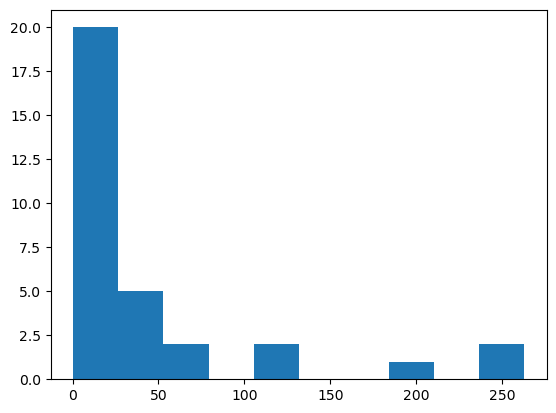

In [30]:
plt.hist(data['Total Luas'])

(array([7., 4., 3., 0., 4., 0., 0., 2., 0., 2.]),
 array([  0.73 ,  26.943,  53.156,  79.369, 105.582, 131.795, 158.008,
        184.221, 210.434, 236.647, 262.86 ]),
 <BarContainer object of 10 artists>)

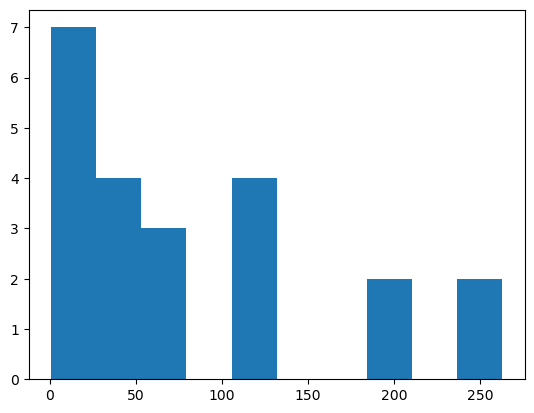

In [31]:
plt.hist(cleaned['Total Luas'])

# Train test split

In [32]:
train_data = cleaned
X = train_data.drop(['Total Luas'], axis=1)
y = train_data['Total Luas']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model Development

## Linear Regression

In [33]:
model1 = LinearRegression().fit(X, y)

In [34]:
model1.score(X, y)

0.6150094069805283

## XGBoost

In [35]:
model2 = xgb.XGBRFRegressor().fit(X, y)

In [36]:
model2.score(X, y)

0.9326726305782954

* Model Linear Regression memberikan score sebesar: 0.6150094069805283
* Model Extreme Gradient Boost memberikan score sebesar: 0.9326726305782954

Model dengan score terbaik adalah Extreme Gradient Boost

# Save Model

In [37]:
import pickle
# Save the model to a file
with open('model.pkl', 'wb') as file1:
    pickle.dump(model2, file1)

In [39]:
#Load the model from the file
with open('model.pkl', 'rb') as file1:
    loaded_model = pickle.load(file1)

# Inference

In [41]:
input = {
    'Jarak ke Ibu Kota Kabupaten (km)': [62, 51, 49, 30.56],
    'Jumlah Penduduk' : [2190, 3476, 901, 1956],
    'Kepadatan Penduduk': [122, 133, 257, 280],
    'Perempuan': [1450, 1567, 457, 1870],
    'Usia Lansia (60 ke atas)': [424, 172, 331, 329],
    'Usia Anak (0-14 tahun)': [1655, 876, 472, 568],
    'Ibu Hamil':[104, 150, 78, 96],
    'Tingkat Pendidikan (SMA/sederajat)': [374, 472, 146, 389]
}

X_new = pd.DataFrame(input)
X_new

,Jarak ke Ibu Kota Kabupaten (km),Jumlah Penduduk,Kepadatan Penduduk,Perempuan,Usia Lansia (60 ke atas),Usia Anak (0-14 tahun),Ibu Hamil,Tingkat Pendidikan (SMA/sederajat)
0,62.00,2190,122,1450,424,1655,104,374
1,51.00,3476,133,1567,172,876,150,472
2,49.00,901,257,457,331,472,78,146
3,30.56,1956,280,1870,329,568,96,389


In [42]:
loaded_model.predict(X_new)

array([ 76.89804, 131.75443,  62.84077,  63.08307], dtype=float32)